In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time module.
import time
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the API key.
from config import weather_api_key
# Import linear regression from the SciPy stats module. 6.4.1
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

caravelas br
hofn is
pontes e lacerda br
khandyga ru
lavrentiya ru
albany au
kambove cd
barrow us
ombessa cm
zhuhai cn
kamenskoye ru
vao nc
ushuaia ar
nikolskoye ru
rikitea pf
punta arenas cl
bethel us
klaksvik fo
samusu ws
hasaki jp
gander ca
georgetown sh
nanortalik gl
bodinayakkanur in
daru pg
jambusar in
te anau nz
dingle ie
hithadhoo mv
port elizabeth za
hobart au
mataura pf
mabaruma gy
khatanga ru
nikolskoye ru
xuddur so
vaini to
taolanaro mg
castro cl
sitka us
cabo san lucas mx
talnakh ru
chokurdakh ru
la orilla mx
richards bay za
bredasdorp za
kamenka ru
margate za
east london za
lavrentiya ru
cherskiy ru
neepawa ca
isangel vu
puerto ayora ec
carnarvon au
severo-kurilsk ru
torbay ca
marcona pe
deming us
puerto ayora ec
buchanan lr
hermanus za
barrow us
barrow us
miandoab ir
butaritari ki
busselton au
tosya tr
puerto ayora ec
sarahan in
whitehorse ca
rikitea pf
wald-michelbach de
ushuaia ar
bluff nz
ushuaia ar
port alfred za
rikitea pf
hobart au
mount isa au
airai pw
hobart au
j

samusu ws
mataura pf
srednekolymsk ru
nuuk gl
batemans bay au
omboue ga
rikitea pf
vaini to
dwarka in
puerto ayora ec
port macquarie au
bluff nz
pangnirtung ca
avarua ck
tawkar sd
yellowknife ca
kapaa us
lakatoro vu
new norfolk au
vaini to
mahebourg mu
atuona pf
rawson ar
ransang ph
hobart au
rikitea pf
saleaula ws
rikitea pf
grindavik is
barrow us
fuyu cn
samusu ws
guerrero negro mx
ust-kuyga ru
batagay ru
mar del plata ar
kaitangata nz
ust-koksa ru
rikitea pf
atuona pf
kloulklubed pw
albany au
grand river south east mu
albany au
esperance au
shelburne ca
upernavik gl
bredasdorp za
halifax ca
paragominas br
kitimat ca
deputatskiy ru
hobart au
yellowknife ca
aljezur pt
illoqqortoormiut gl
johi pk
lavrentiya ru
aojiang cn
acarau br
formoso do araguaia br
vaini to
avarua ck
zhigansk ru
antibes fr
hilo us
ushuaia ar
rikitea pf
puerto ayora ec
provideniya ru
vaini to
castro cl
noumea nc
coahuayana mx
attawapiskat ca
shenjiamen cn
qaanaaq gl
guerrero negro mx
artyk ru
bambous virieux mu
ush

port alfred za
victoria point au
mergui mm
butaritari ki
busselton au
tiarei pf
hasaki jp
ushuaia ar
ribeira brava cv
petropavlovsk-kamchatskiy ru
butaritari ki
uporovo ru
belushya guba ru
vardo no
ahuimanu us
kavieng pg
ginir et
bredasdorp za
illoqqortoormiut gl
roma au
esperance au
castro cl
urdzhar kz
bluff nz
haldibari in
albany au
hasaki jp
asau tv
sakakah sa
new norfolk au
charters towers au
yellowknife ca
mahebourg mu
chernaya kholunitsa ru
busselton au
labuhan id
sao joao da barra br
mataura pf
qaanaaq gl
kaitangata nz
barrow us
souillac mu
hilo us
pekan my
georgetown sh
port augusta au
victoria sc
mahebourg mu
lebu cl
constitucion mx
torbay ca
rikitea pf
dikson ru
puerto ayora ec


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4873d446723675828e7558706dff1124


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4873d446723675828e7558706dff1124&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url_bad = url + "&q=" + "Bston"
city_weather_bad = requests.get(city_url_bad)
city_weather_bad

<Response [404]>

In [12]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4873d446723675828e7558706dff1124&q=Boston'

In [13]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":77.36,"feels_like":78.42,"temp_min":72.95,"temp_max":80.85,"pressure":1021,"humidity":77},"visibility":10000,"wind":{"speed":7,"deg":277,"gust":18.01},"clouds":{"all":75},"dt":1624753169,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1624698540,"sunset":1624753506},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
boston_data = city_weather.json()

In [16]:
boston_data["sys"]['country']

'US'

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 80.85 77 75 7


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 6, 27, 0, 19, 29)

In [19]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-06-27 00:19:29'

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
   # if (i % 50 == 0 and i >= 50):
        #set_count += 1
      #  record_count = 1
    # Create endpoint URL with each city.
    #ity_url = url + "&q=" + cities[i]

In [22]:
cities

['caravelas',
 'hofn',
 'pontes e lacerda',
 'khandyga',
 'lavrentiya',
 'albany',
 'kambove',
 'barrow',
 'ombessa',
 'zhuhai',
 'kamenskoye',
 'vao',
 'ushuaia',
 'nikolskoye',
 'rikitea',
 'punta arenas',
 'bethel',
 'klaksvik',
 'samusu',
 'hasaki',
 'gander',
 'georgetown',
 'nanortalik',
 'bodinayakkanur',
 'daru',
 'jambusar',
 'te anau',
 'dingle',
 'hithadhoo',
 'port elizabeth',
 'hobart',
 'mataura',
 'mabaruma',
 'khatanga',
 'xuddur',
 'vaini',
 'taolanaro',
 'castro',
 'sitka',
 'cabo san lucas',
 'talnakh',
 'chokurdakh',
 'la orilla',
 'richards bay',
 'bredasdorp',
 'kamenka',
 'margate',
 'east london',
 'cherskiy',
 'neepawa',
 'isangel',
 'puerto ayora',
 'carnarvon',
 'severo-kurilsk',
 'torbay',
 'marcona',
 'deming',
 'buchanan',
 'hermanus',
 'miandoab',
 'butaritari',
 'busselton',
 'tosya',
 'sarahan',
 'whitehorse',
 'wald-michelbach',
 'bluff',
 'port alfred',
 'mount isa',
 'airai',
 'jamestown',
 'saint george',
 'souillac',
 'tsihombe',
 'copiapo',
 'mys 

In [23]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | hofn
Processing Record 3 of Set 1 | pontes e lacerda
Processing Record 4 of Set 1 | khandyga
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | kambove
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | ombessa
Processing Record 10 of Set 1 | zhuhai
Processing Record 11 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 12 of Set 1 | vao
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | hasaki
Processing Record 21 of Set 1 | gander
Processing Record 22 of Set 1 | georgetown
Processing Record 23 of Set 1 | nanortalik
Processing Rec

Processing Record 41 of Set 4 | ust-tsilma
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | bartica
Processing Record 44 of Set 4 | paita
Processing Record 45 of Set 4 | tazmalt
Processing Record 46 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 4 | bengkulu
Processing Record 48 of Set 4 | bonthe
Processing Record 49 of Set 4 | new norfolk
Processing Record 50 of Set 4 | sao filipe
Processing Record 1 of Set 5 | chumikan
Processing Record 2 of Set 5 | hami
Processing Record 3 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 5 | sinnamary
Processing Record 5 of Set 5 | drumheller
Processing Record 6 of Set 5 | ancud
Processing Record 7 of Set 5 | kapaa
Processing Record 8 of Set 5 | barcelona
Processing Record 9 of Set 5 | broome
Processing Record 10 of Set 5 | manggar
Processing Record 11 of Set 5 | weiser
Processing Record 12 of Set 5 | east wenatchee bench
Processing Record 13 of Set 5 | provideniya
Processing R

Processing Record 29 of Set 8 | batemans bay
Processing Record 30 of Set 8 | dwarka
Processing Record 31 of Set 8 | port macquarie
Processing Record 32 of Set 8 | pangnirtung
Processing Record 33 of Set 8 | tawkar
City not found. Skipping...
Processing Record 34 of Set 8 | lakatoro
Processing Record 35 of Set 8 | rawson
Processing Record 36 of Set 8 | ransang
Processing Record 37 of Set 8 | fuyu
Processing Record 38 of Set 8 | ust-kuyga
Processing Record 39 of Set 8 | batagay
Processing Record 40 of Set 8 | ust-koksa
Processing Record 41 of Set 8 | kloulklubed
Processing Record 42 of Set 8 | shelburne
Processing Record 43 of Set 8 | halifax
Processing Record 44 of Set 8 | paragominas
Processing Record 45 of Set 8 | kitimat
Processing Record 46 of Set 8 | deputatskiy
Processing Record 47 of Set 8 | aljezur
Processing Record 48 of Set 8 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 8 | johi
Processing Record 50 of Set 8 | aojiang
Processing Record 1 of Set 9 

Processing Record 13 of Set 12 | anapskaya
Processing Record 14 of Set 12 | umm ruwabah
City not found. Skipping...
Processing Record 15 of Set 12 | myaundzha
Processing Record 16 of Set 12 | kolo
Processing Record 17 of Set 12 | nakambala
Processing Record 18 of Set 12 | aksu
Processing Record 19 of Set 12 | saint-joseph
Processing Record 20 of Set 12 | haines junction
Processing Record 21 of Set 12 | marsh harbour
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | urusha
Processing Record 24 of Set 12 | goderich
Processing Record 25 of Set 12 | tsiroanomandidy
Processing Record 26 of Set 12 | makakilo city
Processing Record 27 of Set 12 | chernyshevskiy
Processing Record 28 of Set 12 | huazhou
Processing Record 29 of Set 12 | longyearbyen
Processing Record 30 of Set 12 | yeppoon
Processing Record 31 of Set 12 | kurchum
Processing Record 32 of Set 12 | cabedelo
Processing Record 33 of Set 12 | codrington
Processing Record 34 of Set 12 | arica
Processing Re

In [24]:
city_data

[{'City': 'Caravelas',
  'Lat': -17.7125,
  'Lng': -39.2481,
  'Max Temp': 68.81,
  'Humidity': 64,
  'Cloudiness': 2,
  'Wind Speed': 4.5,
  'Country': 'BR',
  'Date': '2021-06-27 00:20:19'},
 {'City': 'Hofn',
  'Lat': 64.2539,
  'Lng': -15.2082,
  'Max Temp': 52.05,
  'Humidity': 64,
  'Cloudiness': 60,
  'Wind Speed': 2.13,
  'Country': 'IS',
  'Date': '2021-06-27 00:20:20'},
 {'City': 'Pontes E Lacerda',
  'Lat': -15.2261,
  'Lng': -59.3353,
  'Max Temp': 78.37,
  'Humidity': 46,
  'Cloudiness': 36,
  'Wind Speed': 2.13,
  'Country': 'BR',
  'Date': '2021-06-27 00:20:20'},
 {'City': 'Khandyga',
  'Lat': 62.6667,
  'Lng': 135.6,
  'Max Temp': 79.72,
  'Humidity': 40,
  'Cloudiness': 97,
  'Wind Speed': 1.1,
  'Country': 'RU',
  'Date': '2021-06-27 00:20:20'},
 {'City': 'Lavrentiya',
  'Lat': 65.5833,
  'Lng': -171,
  'Max Temp': 44.51,
  'Humidity': 89,
  'Cloudiness': 98,
  'Wind Speed': 6.29,
  'Country': 'RU',
  'Date': '2021-06-27 00:20:10'},
 {'City': 'Albany',
  'Lat': 42.6001

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,68.81,64,2,4.50,BR,2021-06-27 00:20:19
1,Hofn,64.2539,-15.2082,52.05,64,60,2.13,IS,2021-06-27 00:20:20
2,Pontes E Lacerda,-15.2261,-59.3353,78.37,46,36,2.13,BR,2021-06-27 00:20:20
3,Khandyga,62.6667,135.6000,79.72,40,97,1.10,RU,2021-06-27 00:20:20
4,Lavrentiya,65.5833,-171.0000,44.51,89,98,6.29,RU,2021-06-27 00:20:10
5,Albany,42.6001,-73.9662,80.55,74,100,7.78,US,2021-06-27 00:15:08
6,Kambove,-10.8764,26.5969,54.91,56,0,3.40,CD,2021-06-27 00:20:21
7,Barrow,71.2906,-156.7887,50.02,66,1,13.80,US,2021-06-27 00:20:21
8,Ombessa,4.6030,11.2565,68.72,98,100,2.53,CM,2021-06-27 00:20:21
9,Zhuhai,22.2769,113.5678,87.71,89,40,9.22,CN,2021-06-27 00:20:21


In [26]:
new_column_order = ["City", "Country", 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df_clean= city_data_df[new_column_order]
city_data_df_clean.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caravelas,BR,2021-06-27 00:20:19,-17.7125,-39.2481,68.81,64,2,4.50
1,Hofn,IS,2021-06-27 00:20:20,64.2539,-15.2082,52.05,64,60,2.13
2,Pontes E Lacerda,BR,2021-06-27 00:20:20,-15.2261,-59.3353,78.37,46,36,2.13
3,Khandyga,RU,2021-06-27 00:20:20,62.6667,135.6000,79.72,40,97,1.10
4,Lavrentiya,RU,2021-06-27 00:20:10,65.5833,-171.0000,44.51,89,98,6.29
5,Albany,US,2021-06-27 00:15:08,42.6001,-73.9662,80.55,74,100,7.78
6,Kambove,CD,2021-06-27 00:20:21,-10.8764,26.5969,54.91,56,0,3.40
7,Barrow,US,2021-06-27 00:20:21,71.2906,-156.7887,50.02,66,1,13.80
8,Ombessa,CM,2021-06-27 00:20:21,4.6030,11.2565,68.72,98,100,2.53
9,Zhuhai,CN,2021-06-27 00:20:21,22.2769,113.5678,87.71,89,40,9.22


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df_clean.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

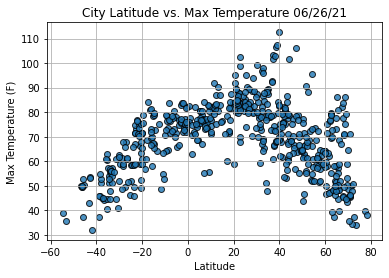

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

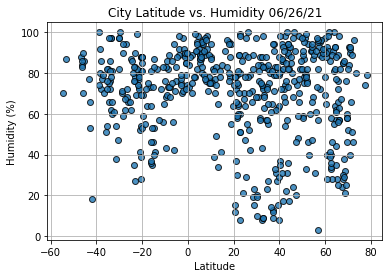

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

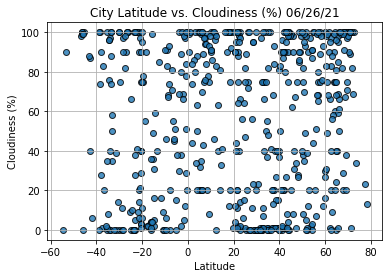

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

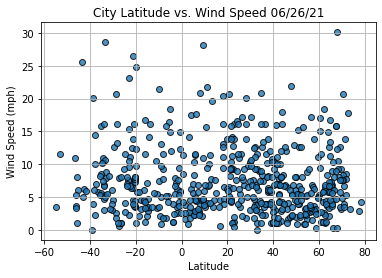

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

NameError: name 'x_values' is not defined

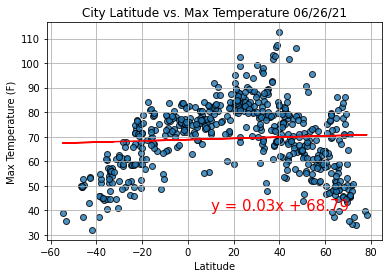

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

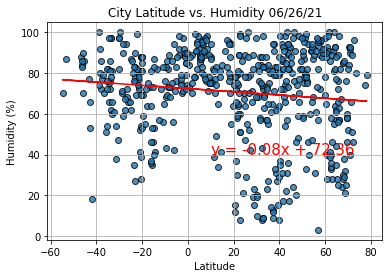

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [36]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    74.71
Humidity                       76
Cloudiness                      5
Wind Speed                   9.51
Country                        PF
Date          2021-06-27 00:19:36
Name: 13, dtype: object

In [37]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
551    False
552     True
553    False
554     True
555    False
Name: Lat, Length: 556, dtype: bool

In [38]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hofn,64.2539,-15.2082,52.05,64,60,2.13,IS,2021-06-27 00:20:20
3,Khandyga,62.6667,135.6000,79.72,40,97,1.10,RU,2021-06-27 00:20:20
4,Lavrentiya,65.5833,-171.0000,44.51,89,98,6.29,RU,2021-06-27 00:20:10
5,Albany,42.6001,-73.9662,80.55,74,100,7.78,US,2021-06-27 00:15:08
7,Barrow,71.2906,-156.7887,50.02,66,1,13.80,US,2021-06-27 00:20:21


In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [50]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

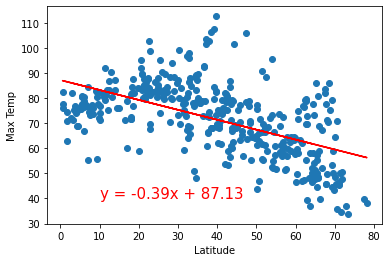

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

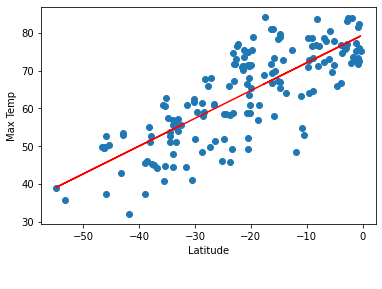

In [68]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,15))

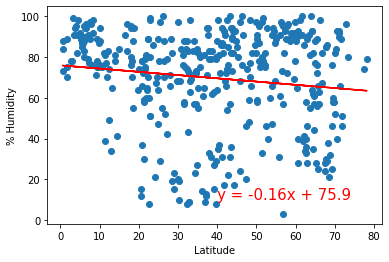

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

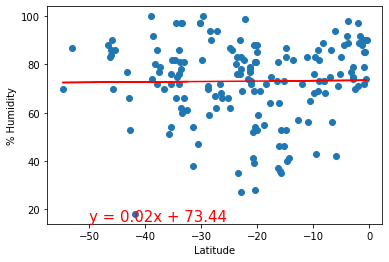

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

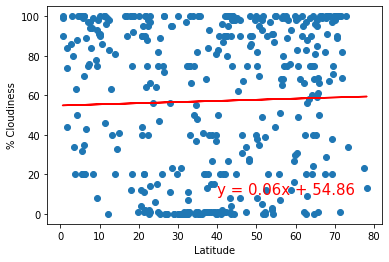

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

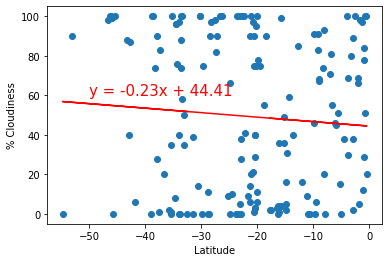

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

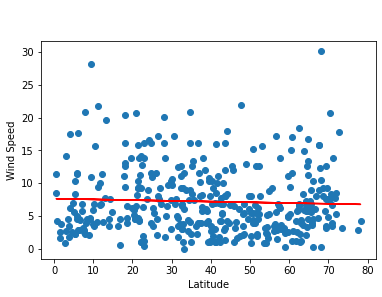

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

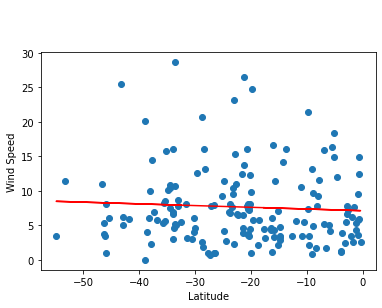

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Wind Speed", 
                       'Wind Speed',(-50,35))